In [ ]:
# !pip install joblib

In [58]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import string
import warnings
import joblib

In [59]:
# importing dataset
dataset_columns = ["target", "ids", "date", "flag", "user", "text"]
dataset_encode = "ISO-8859-1"
data = pd.read_csv("training.1600000.processed.noemoticon.csv", encoding = dataset_encode, names = dataset_columns)

In [60]:
data.head()

,target,ids,date,flag,user,text
0,0,1467810369,Mon Apr 06 22:19:45 PDT 2009,NO_QUERY,_TheSpecialOne_,"@switchfoot http://twitpic.com/2y1zl - Awww, t..."
1,0,1467810672,Mon Apr 06 22:19:49 PDT 2009,NO_QUERY,scotthamilton,is upset that he can't update his Facebook by ...
2,0,1467810917,Mon Apr 06 22:19:53 PDT 2009,NO_QUERY,mattycus,@Kenichan I dived many times for the ball. Man...
3,0,1467811184,Mon Apr 06 22:19:57 PDT 2009,NO_QUERY,ElleCTF,my whole body feels itchy and like its on fire
4,0,1467811193,Mon Apr 06 22:19:57 PDT 2009,NO_QUERY,Karoli,"@nationwideclass no, it's not behaving at all...."


In [102]:
data.isnull().any().sum()

target    0
ids       0
date      0
flag      0
user      0
text      0
dtype: int64

In [62]:
data['target'].value_counts()

0    800000
4    800000
Name: target, dtype: int64

In [63]:
# changing target value from {0,4} to {0,1}

t = []
for i in data.target.values:
    if i ==0: t.append(0)
    else: t.append(1)
        
df = pd.DataFrame({"text":data.text.values, "target":t})
print("positive, negative :", set(df.target))

positive, negative : {0, 1}


In [64]:
df['target'].value_counts()

0    800000
1    800000
Name: target, dtype: int64

In [65]:
# checking out the negative comments from the train set

df[df['target'] == 0].head(10)

,text,target
0,"@switchfoot http://twitpic.com/2y1zl - Awww, t...",0
1,is upset that he can't update his Facebook by ...,0
2,@Kenichan I dived many times for the ball. Man...,0
3,my whole body feels itchy and like its on fire,0
4,"@nationwideclass no, it's not behaving at all....",0
5,@Kwesidei not the whole crew,0
6,Need a hug,0
7,@LOLTrish hey long time no see! Yes.. Rains a...,0
8,@Tatiana_K nope they didn't have it,0
9,@twittera que me muera ?,0


In [66]:
# checking out the postive comments from the train set 

df[df['target'] == 1].head(10)
     

,text,target
800000,I LOVE @Health4UandPets u guys r the best!!,1
800001,im meeting up with one of my besties tonight! ...,1
800002,"@DaRealSunisaKim Thanks for the Twitter add, S...",1
800003,Being sick can be really cheap when it hurts t...,1
800004,@LovesBrooklyn2 he has that effect on everyone,1
800005,@ProductOfFear You can tell him that I just bu...,1
800006,@r_keith_hill Thans for your response. Ihad al...,1
800007,"@KeepinUpWKris I am so jealous, hope you had a...",1
800008,"@tommcfly ah, congrats mr fletcher for finally...",1
800009,@e4VoIP I RESPONDED Stupid cat is helping me ...,1


<AxesSubplot:>

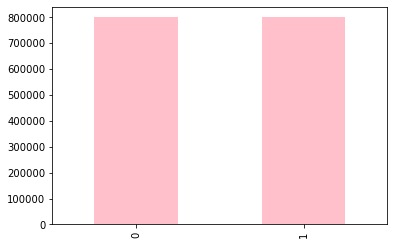

In [67]:
df['target'].value_counts().plot.bar(color = 'pink', figsize = (6, 4))

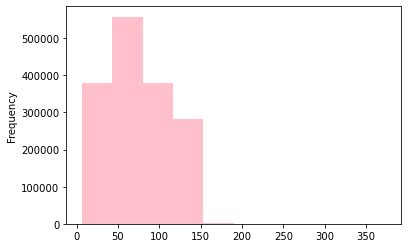

In [68]:
# checking the distribution of tweets in the data

length_train = df['text'].str.len().plot.hist(color = 'pink', figsize = (6, 4))
# length_test = test['tweet'].str.len().plot.hist(color = 'orange', figsize = (6, 4))

Text(0.5, 1.0, 'Most Frequently Occuring Words - Top 30')

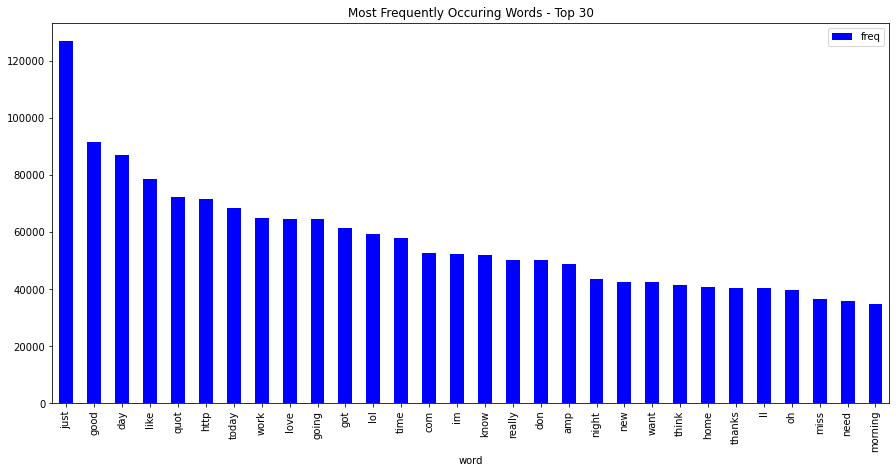

In [69]:

from sklearn.feature_extraction.text import CountVectorizer


cv = CountVectorizer(stop_words = 'english')
words = cv.fit_transform(df.text)

sum_words = words.sum(axis=0)

words_freq = [(word, sum_words[0, i]) for word, i in cv.vocabulary_.items()]
words_freq = sorted(words_freq, key = lambda x: x[1], reverse = True)

frequency = pd.DataFrame(words_freq, columns=['word', 'freq'])

frequency.head(30).plot(x='word', y='freq', kind='bar', figsize=(15, 7), color = 'blue')
plt.title("Most Frequently Occuring Words - Top 30")

Text(0.5, 1.0, 'WordCloud - Vocabulary from Reviews')

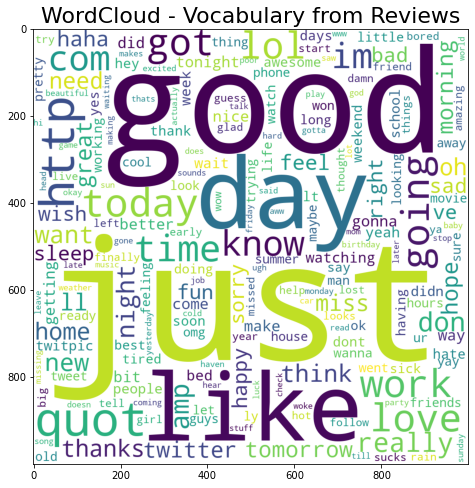

In [70]:
from wordcloud import WordCloud

wordcloud = WordCloud(background_color = 'white', width = 1000, height = 1000).generate_from_frequencies(dict(words_freq))

plt.figure(figsize=(10,8))
plt.imshow(wordcloud)
plt.title("WordCloud - Vocabulary from Reviews", fontsize = 22)

In [71]:

# normal_words =' '.join([text for text in df['text'][df['target'] == 0]])

# wordcloud = WordCloud(width=800, height=500, random_state = 0, max_font_size = 110).generate(normal_words)
# plt.figure(figsize=(10, 7))
# plt.imshow(wordcloud, interpolation="bilinear")
# plt.axis('off')
# plt.title('The Neutral Words')
# plt.show()

In [72]:
# collecting the hashtags

def hashtag_extract(x):
    hashtags = []
    
    for i in x:
        ht = re.findall(r"#(\w+)", i)
        hashtags.append(ht)

    return hashtags
     

In [73]:
import re

In [74]:

# extracting hashtags from positive tweets
HT_regular = hashtag_extract(df['text'][df['target'] == 0])

# extracting hashtags from negative tweets
HT_negative = hashtag_extract(df['text'][df['target'] == 1])

# unnesting list
HT_regular = sum(HT_regular,[])
HT_negative = sum(HT_negative,[])
     

In [75]:
import nltk

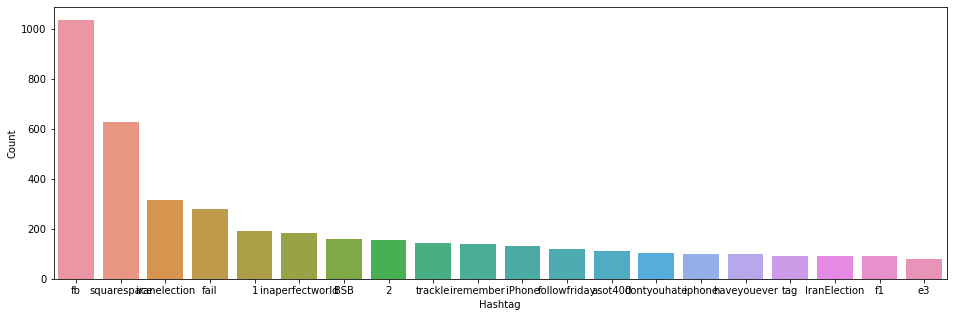

In [76]:
a = nltk.FreqDist(HT_regular)
d = pd.DataFrame({'Hashtag': list(a.keys()),
                  'Count': list(a.values())})

# selecting top 20 most frequent hashtags     
d = d.nlargest(columns="Count", n = 20) 
plt.figure(figsize=(16,5))
ax = sns.barplot(data=d, x= "Hashtag", y = "Count")
ax.set(ylabel = 'Count')
plt.show()

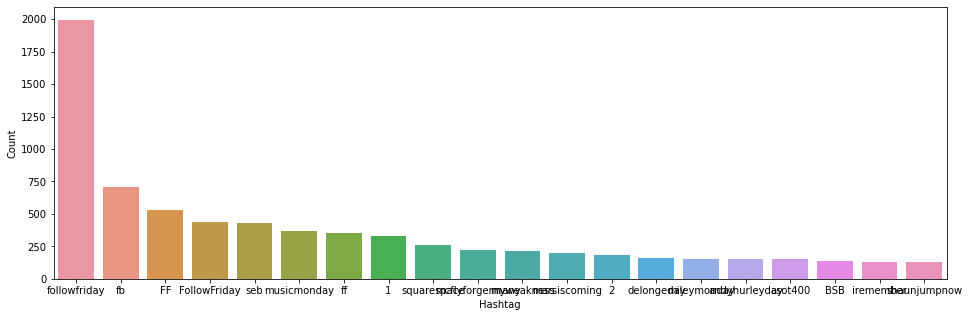

In [77]:
a = nltk.FreqDist(HT_negative)
d = pd.DataFrame({'Hashtag': list(a.keys()),
                  'Count': list(a.values())})

# selecting top 20 most frequent hashtags     
d = d.nlargest(columns="Count", n = 20) 
plt.figure(figsize=(16,5))
ax = sns.barplot(data=d, x= "Hashtag", y = "Count")
ax.set(ylabel = 'Count')
plt.show()
     


## Text pre-processing

In [78]:
#remove punctuation
def remove_punctuation(text):
    no_punct=[words for words in text if words not in string.punctuation]
    words_wo_punct=''.join(no_punct)
    return words_wo_punct
df['clean_text']=df['text'].apply(lambda x: remove_punctuation(x))
df.head()

,text,target,clean_text
0,"@switchfoot http://twitpic.com/2y1zl - Awww, t...",0,switchfoot httptwitpiccom2y1zl Awww thats a b...
1,is upset that he can't update his Facebook by ...,0,is upset that he cant update his Facebook by t...
2,@Kenichan I dived many times for the ball. Man...,0,Kenichan I dived many times for the ball Manag...
3,my whole body feels itchy and like its on fire,0,my whole body feels itchy and like its on fire
4,"@nationwideclass no, it's not behaving at all....",0,nationwideclass no its not behaving at all im ...


In [79]:
import re
#remove hyperlink
df['clean_text'] = df['clean_text'].str.replace(r"http\S+", "") 
# #remove emoji
# data['clean_text'] = data['clean_text'].str.replace('[^\w\s#@/:%.,_-]', '', flags=re.UNICODE)
#convert all words to lowercase
df['clean_text'] = df['clean_text'].str.lower()
df.head()

C:\Users\sande\AppData\Local\Temp\ipykernel_9792\339743526.py:3: FutureWarning: The default value of regex will change from True to False in a future version.
  df['clean_text'] = df['clean_text'].str.replace(r"http\S+", "")


,text,target,clean_text
0,"@switchfoot http://twitpic.com/2y1zl - Awww, t...",0,switchfoot awww thats a bummer you shoulda ...
1,is upset that he can't update his Facebook by ...,0,is upset that he cant update his facebook by t...
2,@Kenichan I dived many times for the ball. Man...,0,kenichan i dived many times for the ball manag...
3,my whole body feels itchy and like its on fire,0,my whole body feels itchy and like its on fire
4,"@nationwideclass no, it's not behaving at all....",0,nationwideclass no its not behaving at all im ...


In [80]:
def cleaning_numbers(data):
    return re.sub('[0-9]+', '', data)
df['clean_text'] = df['clean_text'].apply(lambda x: cleaning_numbers(x))
df['clean_text'].tail()

1599995    just woke up having no school is the best feel...
1599996    thewdbcom  very cool to hear old walt intervie...
1599997    are you ready for your mojo makeover ask me fo...
1599998    happy th birthday to my boo of alll time tupac...
1599999    happy charitytuesday thenspcc sparkscharity sp...
Name: clean_text, dtype: object

## Stemming

In [81]:
# # Stemming
# import nltk
# st = nltk.PorterStemmer()
# df
# def stemming_on_text(data):
#     text = [st.stem(word) for word in data]
#     return data
# df['clean_text']= df['clean_text'].apply(lambda x: stemming_on_text(x))
# df['clean_text'].head()

## Lematization

In [82]:
# # lemmatization
# lm = nltk.WordNetLemmatizer()
# def lemmatizer_on_text(data):
#     text = [lm.lemmatize(word) for word in data]
#     return data
# df['clean_text'] = df['clean_text'].apply(lambda x: lemmatizer_on_text(x))
# df['clean_text'].head()

In [83]:
#tokenization
nltk.download('punkt')
def tokenize(text):
    split=re.split("\W+",text) 
    return split
df['clean_text_tokenize']=df['clean_text'].apply(lambda x: tokenize(x.lower()))

[nltk_data] Downloading package punkt to C:\Users\sande/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


In [84]:
#stopwords
nltk.download('stopwords')
stopword = nltk.corpus.stopwords.words('english')
def remove_stopwords(text):
    text=[word for word in text if word not in stopword]
    return text
df['clean_text_tokenize_stopwords'] = df['clean_text_tokenize'].apply(lambda x: remove_stopwords(x))
df.head(10)

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\sande/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


,text,target,clean_text,clean_text_tokenize,clean_text_tokenize_stopwords
0,"@switchfoot http://twitpic.com/2y1zl - Awww, t...",0,switchfoot awww thats a bummer you shoulda ...,"[switchfoot, awww, thats, a, bummer, you, shou...","[switchfoot, awww, thats, bummer, shoulda, got..."
1,is upset that he can't update his Facebook by ...,0,is upset that he cant update his facebook by t...,"[is, upset, that, he, cant, update, his, faceb...","[upset, cant, update, facebook, texting, might..."
2,@Kenichan I dived many times for the ball. Man...,0,kenichan i dived many times for the ball manag...,"[kenichan, i, dived, many, times, for, the, ba...","[kenichan, dived, many, times, ball, managed, ..."
3,my whole body feels itchy and like its on fire,0,my whole body feels itchy and like its on fire,"[my, whole, body, feels, itchy, and, like, its...","[whole, body, feels, itchy, like, fire, ]"
4,"@nationwideclass no, it's not behaving at all....",0,nationwideclass no its not behaving at all im ...,"[nationwideclass, no, its, not, behaving, at, ...","[nationwideclass, behaving, im, mad, cant, see, ]"
5,@Kwesidei not the whole crew,0,kwesidei not the whole crew,"[kwesidei, not, the, whole, crew, ]","[kwesidei, whole, crew, ]"
6,Need a hug,0,need a hug,"[need, a, hug, ]","[need, hug, ]"
7,@LOLTrish hey long time no see! Yes.. Rains a...,0,loltrish hey long time no see yes rains a bit...,"[loltrish, hey, long, time, no, see, yes, rain...","[loltrish, hey, long, time, see, yes, rains, b..."
8,@Tatiana_K nope they didn't have it,0,tatianak nope they didnt have it,"[tatianak, nope, they, didnt, have, it, ]","[tatianak, nope, didnt, ]"
9,@twittera que me muera ?,0,twittera que me muera,"[twittera, que, me, muera, ]","[twittera, que, muera, ]"


In [87]:
# Stemming
import nltk
st = nltk.PorterStemmer()
def stemming_on_text(data):
    text = [st.stem(word) for word in data]
    return data
df['clean_text']= df['clean_text'].apply(lambda x: stemming_on_text(x))
df['clean_text'].head()

0    switchfoot   awww thats a bummer  you shoulda ...
1    is upset that he cant update his facebook by t...
2    kenichan i dived many times for the ball manag...
3      my whole body feels itchy and like its on fire 
4    nationwideclass no its not behaving at all im ...
Name: clean_text, dtype: object

In [88]:
# lemmatization
lm = nltk.WordNetLemmatizer()
def lemmatizer_on_text(data):
    text = [lm.lemmatize(word) for word in data]
    return data
df['clean_text'] = df['clean_text'].apply(lambda x: lemmatizer_on_text(x))
df['clean_text'].head()

0    switchfoot   awww thats a bummer  you shoulda ...
1    is upset that he cant update his facebook by t...
2    kenichan i dived many times for the ball manag...
3      my whole body feels itchy and like its on fire 
4    nationwideclass no its not behaving at all im ...
Name: clean_text, dtype: object

## Splitting Train and Test data

In [89]:
from sklearn.model_selection import train_test_split
X = df['text']
y = df['target']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=42)

print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(1440000,)
(160000,)
(1440000,)
(160000,)


In [90]:
y_train.value_counts()

0    720188
1    719812
Name: target, dtype: int64

## Vectorizer

In [91]:
from sklearn.feature_extraction.text import TfidfVectorizer
# vectorizer= TfidfVectorizer(analyzer= "word", ngram_range=(1,3))
# X_train_vect = vectorizer.fit_transform(X_train)
# X_test_vect = vectorizer.transform(X_test)
vectoriser=TfidfVectorizer(ngram_range=(1,2),max_features=50000)
vectoriser.fit(X_train)
vectoriser.fit(X_train)
joblib.dump(vectoriser,'./models/vectorizer.joblib')
X_train_vect = vectoriser.transform(X_train)
X_test_vect = vectoriser.transform(X_test)


In [92]:
from sklearn.naive_bayes import MultinomialNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import LinearSVC


## Classification of models

In [93]:
from sklearn.svm import LinearSVC
from sklearn.naive_bayes import BernoulliNB
from sklearn.linear_model import LogisticRegression

from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics import confusion_matrix, classification_report

def model_Evaluate(model):
    #accuracy of model on training data
    acc_train=model.score(X_train_vect, y_train)
    #accuracy of model on test data
    acc_test=model.score(X_test_vect, y_test)
    
    print('Accuracy of model on training data : {}'.format(acc_train*100))
    print('Accuracy of model on testing data : {} \n'.format(acc_test*100))

    # Predict values for Test dataset
    y_pred = model.predict(X_test_vect)

    # Print the evaluation metrics for the dataset.
    print(classification_report(y_test, y_pred))
    
    # Compute and plot the Confusion matrix
    cf_matrix = confusion_matrix(y_test, y_pred)

    categories  = ['Negative','Positive']
    group_names = ['True Neg','False Pos', 'False Neg','True Pos']
    group_percentages = ['{0:.2%}'.format(value) for value in cf_matrix.flatten() / np.sum(cf_matrix)]

    labels = [f'{v1}\n{v2}' for v1, v2 in zip(group_names,group_percentages)]
    labels = np.asarray(labels).reshape(2,2)

    sns.heatmap(cf_matrix, annot = labels, cmap = 'Reds',fmt = '',
                xticklabels = categories, yticklabels = categories)

    plt.xlabel("Predicted values", fontdict = {'size':14}, labelpad = 10)
    plt.ylabel("Actual values"   , fontdict = {'size':14}, labelpad = 10)
    plt.title ("Confusion Matrix", fontdict = {'size':18}, pad = 20)

## Logistic Regrerssion

Accuracy of model on training data : 83.44243055555556
Accuracy of model on testing data : 81.9625 

              precision    recall  f1-score   support

           0       0.83      0.81      0.82     79812
           1       0.81      0.83      0.82     80188

    accuracy                           0.82    160000
   macro avg       0.82      0.82      0.82    160000
weighted avg       0.82      0.82      0.82    160000



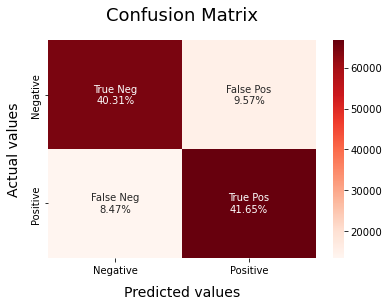

In [94]:

LRmodel = LogisticRegression(C = 2, max_iter = 1000, n_jobs=-1)
LRmodel.fit(X_train_vect, y_train)
joblib.dump(LRmodel,'./models/Logistic_regression.joblib')
model_Evaluate(LRmodel)

## Naive bayes classifier

In [95]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.pipeline import make_pipeline
model = MultinomialNB(alpha= 10)
model.fit(X_train_vect,y_train)
joblib.dump(model,'./models/Naivebayes.joblib')

# vectorizer = TfidfVectorizer(analyzer = "word", ngram_range=(1,3))
# X_train_vect = vectorizer.fit_transform(X_train)
# X_test_vect = vectorizer.transform(X_test)

['./models/Naivebayes.joblib']

In [96]:
# from sklearn.model_selection import cross_val_score
# cross_cnb = cross_val_score(cnb, X_train, y_train,n_jobs = -1)
# print("Cross Validation score = ",cross_cnb)                
# print ("Train accuracy ={:.2f}%".format(cnb.score(X_train,y_train)*100))
# print ("Test accuracy ={:.2f}%".format(cnb.score(X_test,y_test)*100))
# train_acc_cnb=cnb.score(X_train,y_train)
# test_acc_cnb=cnb.score(X_test,y_test)

## SVC

Accuracy of model on training data : 83.50048611111112
Accuracy of model on testing data : 81.8125 

              precision    recall  f1-score   support

           0       0.83      0.80      0.82     79812
           1       0.81      0.83      0.82     80188

    accuracy                           0.82    160000
   macro avg       0.82      0.82      0.82    160000
weighted avg       0.82      0.82      0.82    160000



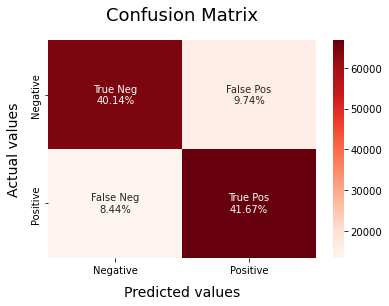

In [97]:
SVCmodel = LinearSVC()
SVCmodel.fit(X_train_vect, y_train)
joblib.dump(SVCmodel,'./models/SVC.joblib')
model_Evaluate(SVCmodel)

## Random Forest

Accuracy of model on training data : 76.16958333333334
Accuracy of model on testing data : 74.04125 

              precision    recall  f1-score   support

           0       0.77      0.69      0.73     79812
           1       0.72      0.79      0.75     80188

    accuracy                           0.74    160000
   macro avg       0.74      0.74      0.74    160000
weighted avg       0.74      0.74      0.74    160000



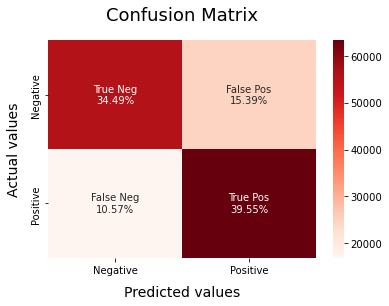

In [98]:
rfmodel = RandomForestClassifier(n_estimators = 20, criterion = 'entropy', max_depth=50)
rfmodel.fit(X_train_vect, y_train)
joblib.dump(rfmodel,'./models/randomforest.joblib')
model_Evaluate(rfmodel)

In [99]:
train = pd.DataFrame()
train['label'] = y_train
train['text'] = X_train

def depression(s, model,vec):
    pred = model.predict(vec.transform([s])) 
    print(pred)
    predprob = model.predict_proba(vec.transform([s]))
    print(predprob)
    if pred[0] == 1:
        
        return print('Not depressed\nProbability: ', np.max(predprob))
    else:
         return print('Depressed\nProbability: ', np.max(predprob))

[1]
[[0.26455528 0.73544472]]
Not depressed
Probability:  0.7354447218782663
Accuracy of model on training data : 80.00458333333333
Accuracy of model on testing data : 79.55187500000001 

              precision    recall  f1-score   support

           0       0.79      0.81      0.80     79812
           1       0.80      0.78      0.79     80188

    accuracy                           0.80    160000
   macro avg       0.80      0.80      0.80    160000
weighted avg       0.80      0.80      0.80    160000



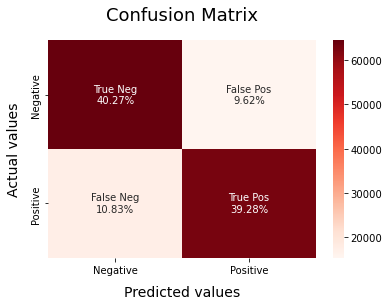

In [103]:
nb = joblib.load('./models/Naivebayes.joblib')
vec = joblib.load('./models/vectorizer.joblib')
depression("my name is sandeep",nb,vec)
model_Evaluate(nb)

In [34]:
# validation = model.predict(X_test_vect)

In [35]:
# from sklearn.metrics import accuracy_score
# accuracy_score(y_test,validation)

0.79558125

In [36]:
# from sklearn.metrics import confusion_matrix
# cf_matrix = confusion_matrix(y_test, validation)
# cf_matrix

array([[68893, 10919],
       [21788, 58400]], dtype=int64)

<AxesSubplot:>

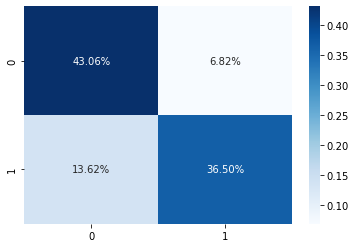

In [37]:
# import seaborn as sns
# import numpy as np
# sns.heatmap(cf_matrix/np.sum(cf_matrix), annot=True, fmt='.2%', cmap='Blues')

In [38]:
# from sklearn.metrics import classification_report
# print(classification_report(y_test, validation))

              precision    recall  f1-score   support

           0       0.76      0.86      0.81     79812
           1       0.84      0.73      0.78     80188

    accuracy                           0.80    160000
   macro avg       0.80      0.80      0.79    160000
weighted avg       0.80      0.80      0.79    160000



In [39]:
# train = pd.DataFrame()
# train['label'] = y_train
# train['text'] = X_train

# def depression(s, model=model):
#     pred = model.predict(vectorizer.transform([s])) 
#     print(pred)
#     predprob = model.predict_proba(vectorizer.transform([s]))
#     print(predprob)
#     if pred[0] == 1:
        
#         return print('Not depressed\nProbability: ', np.max(predprob))
#     else:
#          return print('Depressed\nProbability: ', np.max(predprob))

## Logistic Regression

In [ ]:
# from sklearn.linear_model import LogisticRegression
# X_train_vect1 = vectorizer.fit_transform(X_train)
# X_test_vect1 = vectorizer.transform(X_test)

# # model1 = LogisticRegression()
# # model1.fit(X_train_vect1, y_train)
# # joblib.dump(model1,"./models/logistic_regression.joblib")


# # y_pred = model1.predict(X_test_vect)

# # print("Training Accuracy :", model1.score(X_train_vect1, y_train))
# # print("Validation Accuracy :", model1.score(X_test_vect1, y_test))

# # # calculating the f1 score for the validation set
# # print("f1 score :", f1_score(y_test, y_pred))

# # # confusion matrix
# # cm = confusion_matrix(y_test, y_pred)
# # print(cm)
# C_values = np.linspace(1, 1000, 1000)
# C_values = np.insert(C_values, 0, .0001)
# C_scores = {}
# for c in C_values:
#     lr = LogisticRegression(penalty='l2', C=c)
#     lr.fit(X_train_vect, y_train)
#     acc = lr.score(X_test_vect, y_test)
#     C_scores[c] = acc
# optimal_c = max(C_scores, key=C_scores.get)
# print('Best C value: {}\n'.format(optimal_c))
# print('Accuracy score (Validation set) {}'.format(C_scores[optimal_c]))

In [ ]:
# model1 = LogisticRegression(penalty='l2', C=optimal_c,max_iter = 1000, n_jobs=-1)
# model1.fit(X_train_vect, y_train)
# joblib.dump(model1,'./models/LogisticRegression.joblib')

# train_acc = model1.score(X_train_vect, y_train)
# test_acc = model1.score(X_test_vect, y_test)

## Decision Tree

In [ ]:
# from sklearn.tree import DecisionTreeClassifier

# model2 = DecisionTreeClassifier()
# model2.fit(X_train_vect, y_train)
# joblib.dump(model2,"./models/Decision_Tree.joblib")


# y_pred = model2.predict(X_test_vect)

# print("Training Accuracy :", model.score(X_train_vect, y_train))
# print("Validation Accuracy :", model.score(X_test_vect, y_test))

# # calculating the f1 score for the validation set
# print("f1 score :", f1_score(y_test, y_pred))

# # confusion matrix
# cm = confusion_matrix(y_test, y_pred)
# print(cm)

## SVC

In [ ]:
# from sklearn.svm import SVC

# model3 = SVC()
# model3.fit(X_train_vect, y_train)
# joblib.dump(model3,"./models/SVC.joblib")

# y_pred = model3.predict(X_test_vect)

# print("Training Accuracy :", model3.score(X_train_vect, y_train))
# print("Validation Accuracy :", model3.score(X_test_vect, y_test))

# # calculating the f1 score for the validation set
# print("f1 score :", f1_score(y_test, y_pred))

# # confusion matrix
# cm = confusion_matrix(y_test, y_pred)
# print(cm)

## Random Forest

In [ ]:
# from sklearn.ensemble import RandomForestClassifier
# from sklearn.metrics import confusion_matrix
# from sklearn.metrics import f1_score

# model4 = RandomForestClassifier()
# model4.fit(X_train_vect, y_train)
# joblib.dump(model3,"./models/Random Forest.joblib")

# y_pred = model4.predict(x_test)

# print("Training Accuracy :", model4.score(X_train_vect, y_train))
# print("Validation Accuracy :", model4.score(X_test_vect, y_test))

# # calculating the f1 score for the validation set
# print("F1 score :", f1_score(y_test, y_pred))

# # confusion matrix
# cm = confusion_matrix(y_test, y_pred)
# print(cm)

In [ ]:
# Cross Validation Score
# from sklearn.naive_bayes import ComplementNB
# from sklearn.model_selection import GridSearchCV
# from sklearn.model_selection import cross_val_score
# from sklearn import metrics
# from math import *
# cnb = ComplementNB()
# cnb.fit(X_train, y_train)
# cross_cnb = cross_val_score(cnb, X, y,n_jobs = -1)
# print("Cross Validation score = ",cross_cnb)                
# print ("Train accuracy ={:.2f}%".format(cnb.score(X_train,y_train)*100))
# print ("Test accuracy ={:.2f}%".format(cnb.score(X_test,y_test)*100))
# train_acc_cnb=cnb.score(X_train,y_train)
# test_acc_cnb=cnb.score(X_test,y_test)

In [ ]:
# def model_Evaluate(model):
#     #accuracy of model on training data
#     acc_train=model.score(X_train, y_train)
#     #accuracy of model on test data
#     acc_test=model.score(X_test, y_test)
    
#     print('Accuracy of model on training data : {}'.format(acc_train*100))
#     print('Accuracy of model on testing data : {} \n'.format(acc_test*100))

#     # Predict values for Test dataset
#     y_pred = model.predict(X_test)

#     # Print the evaluation metrics for the dataset.
#     print(classification_report(y_test, y_pred))
    
#     # Compute and plot the Confusion matrix
#     cf_matrix = confusion_matrix(y_test, y_pred)

#     categories  = ['Negative','Positive']
#     group_names = ['True Neg','False Pos', 'False Neg','True Pos']
#     group_percentages = ['{0:.2%}'.format(value) for value in cf_matrix.flatten() / np.sum(cf_matrix)]

#     labels = [f'{vb1}\n{v2}' for v1, v2 in zip(group_names,group_percentages)]
#     labels = np.asarray(labels).reshape(2,2)

#     sns.heatmap(cf_matrix, annot = labels, cmap = 'Reds',fmt = '',
#                 xticklabels = categories, yticklabels = categories)

#     plt.xlabel("Predicted values", fontdict = {'size':14}, labelpad = 10)
#     plt.ylabel("Actual values"   , fontdict = {'size':14}, labelpad = 10)
#     plt.title ("Confusion Matrix", fontdict = {'size':18}, pad = 20)

In [1]:
!pip install dill